In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r"E:\project for portfolio\food orders project 1\food_orders_new_delhi (1).csv")
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [21]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                815 non-null    int64 
 1   Customer ID             815 non-null    object
 2   Restaurant ID           815 non-null    object
 3   Order Date and Time     815 non-null    object
 4   Delivery Date and Time  815 non-null    object
 5   Order Value             815 non-null    int64 
 6   Delivery Fee            815 non-null    int64 
 7   Payment Method          815 non-null    object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          815 non-null    int64 
 10  Payment Processing Fee  815 non-null    int64 
 11  Refunds/Chargebacks     815 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 82.8+ KB


In [24]:
df["Order Date and Time"] = pd.to_datetime(df["Order Date and Time"])
df["Delivery Date and Time"] = pd.to_datetime(df["Delivery Date and Time"])

#first let's create a function to extract numeric values from the Discounts and Offers String
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        # print(discount_str.split("%"))
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0


# apply the function to create a new 'Discount Value' column
df["Discount percentage"] = df["Discounts and Offers"].apply(lambda x: extract_discount(x))

# for percentage discounts, calculate the discount amount based on the order value
df["Discount Amount"] = df.apply(lambda x: (x["Order Value"] * x["Discount percentage"]/100)
                                 if x["Discount percentage"]<=15
                                 else x["Discount percentage"],axis = 1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
# df['Discount Amount'] = df.apply(lambda x: x['Discount Amount'] if x['Discount percentage'] <= 1
#                                                   else x['Order Value'] * x['Discount percentage'] / 100, axis=1)

print(df[['Order Value', 'Discounts and Offers', 'Discount percentage', 'Discount Amount','Delivery Fee','Commission Fee','Payment Processing Fee']].head(),"\n\n",df.dtypes)


   Order Value Discounts and Offers  Discount percentage  Discount Amount  \
0         1914            5% on App                  5.0            95.70   
1          986                  10%                 10.0            98.60   
2          937         15% New User                 15.0           140.55   
4         1992         50 off Promo                 50.0            50.00   
5          439                  10%                 10.0            43.90   

   Delivery Fee  Commission Fee  Payment Processing Fee  
0             0             150                      47  
1            40             198                      23  
2            30             195                      45  
4            30             130                      50  
5            20              92                      27   

 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time

In [25]:
df.columns.values.tolist()

['Order ID',
 'Customer ID',
 'Restaurant ID',
 'Order Date and Time',
 'Delivery Date and Time',
 'Order Value',
 'Delivery Fee',
 'Payment Method',
 'Discounts and Offers',
 'Commission Fee',
 'Payment Processing Fee',
 'Refunds/Chargebacks',
 'Discount percentage',
 'Discount Amount']

# Calculating Profitability of Zomato comparing Total Cost and Revenue

In [26]:
df['Total Costs'] = np.sum(df[['Delivery Fee','Payment Processing Fee','Discount Amount']],axis=1)

#Renaming the column name from Commission to Revenue
df.rename(columns={"Commission Fee":"Revenue"},inplace = True)
df["Profit"] = df["Revenue"] - df["Total Costs"]

#Overall Metrics
total_order = df.shape[0]
total_revenue = df['Revenue'].sum()
total_cost = df['Total Costs'].sum()
total_profit = df["Profit"].sum()

overall_metrics ={"Total orders":total_order,"Total revenue":total_revenue,"Total cost":total_cost,"Total profit":total_profit}
print(overall_metrics)

{'Total orders': 815, 'Total revenue': 103798, 'Total cost': 121773.85, 'Total profit': -17975.85}


In [27]:
df.describe()

,Order ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Revenue,Payment Processing Fee,Refunds/Chargebacks,Discount percentage,Discount Amount,Total Costs,Profit
count,815.000000,815,815,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,498.051534,2024-01-20 09:07:49.706748416,2024-01-20 10:21:25.117791232,1055.352147,28.355828,127.359509,29.906748,27.055215,19.957055,91.153190,149.415767,-22.056258
min,1.000000,2024-01-01 02:12:47,2024-01-01 03:59:47,104.000000,0.000000,50.000000,10.000000,0.000000,5.000000,5.600000,30.100000,-298.900000
25%,243.500000,2024-01-11 16:31:10,2024-01-11 18:16:40,598.500000,20.000000,91.000000,20.000000,0.000000,10.000000,50.000000,100.225000,-68.300000
50%,497.000000,2024-01-20 08:57:59,2024-01-20 10:31:37,1039.000000,30.000000,128.000000,30.000000,0.000000,10.000000,60.700000,129.000000,-11.400000
75%,748.500000,2024-01-30 03:26:26,2024-01-30 04:48:14.500000,1496.000000,40.000000,164.000000,40.000000,50.000000,15.000000,127.725000,184.900000,37.050000
max,1000.000000,2024-02-07 22:23:39,2024-02-07 23:53:39,1995.000000,50.000000,200.000000,50.000000,150.000000,50.000000,299.250000,365.400000,140.750000
std,291.673785,NaN,NaN,528.574689,17.206536,42.827545,11.726663,48.324920,17.536326,65.202539,67.872053,82.944658


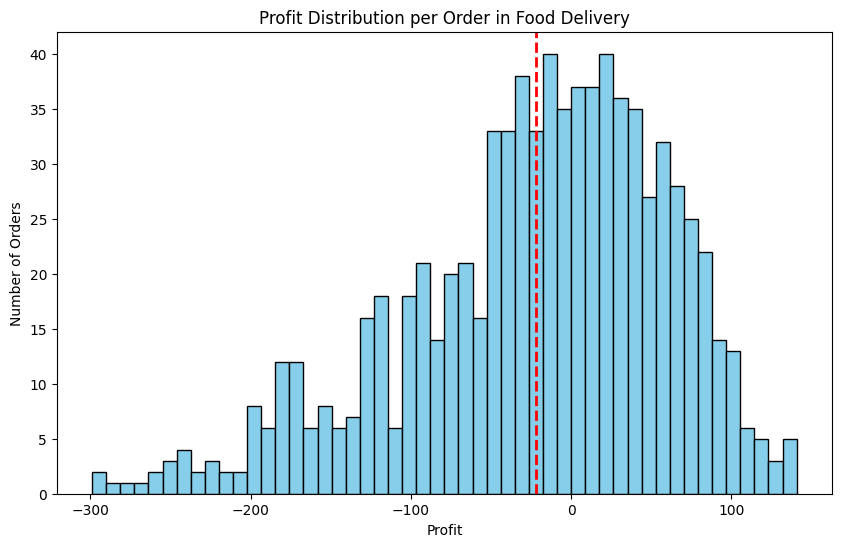

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

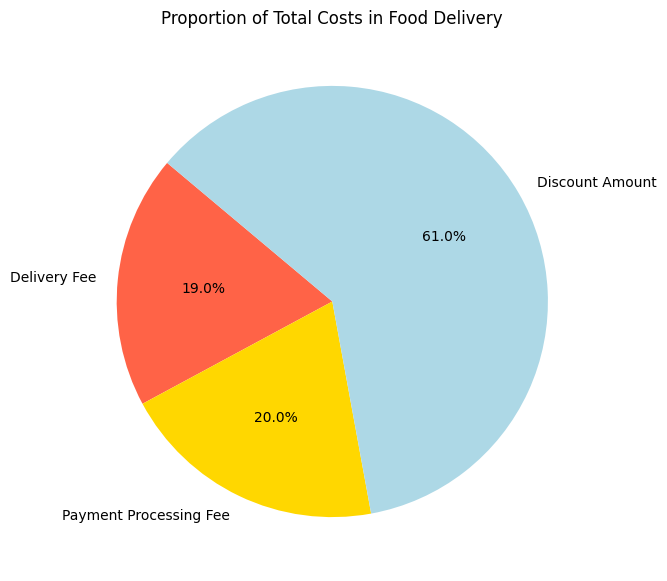

In [29]:
# pie chart for the proportion of total costs
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

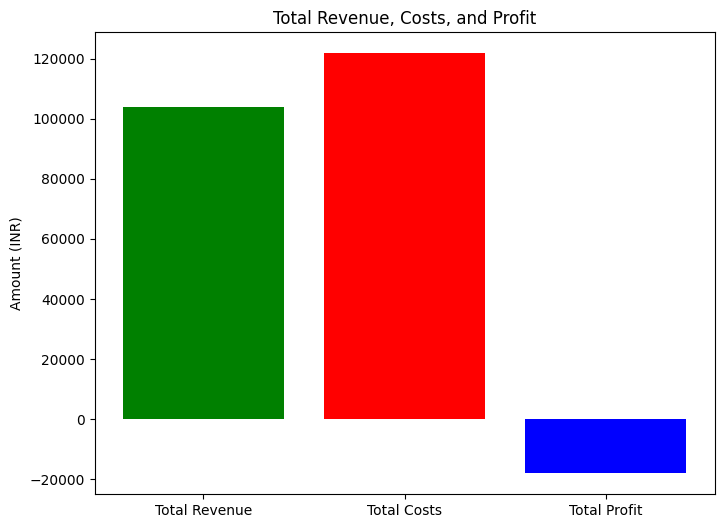

In [30]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_cost, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [31]:
#filtering the data for profitable orders
profitable_orders = df[df.Profit>0]
# print(profitable_orders[:50])

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Revenue'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

"""Note: This shows that we receive 30% profit on each order when we do not provide discount to the customers,
But we saw that these returns reduces to 8% when we provide disounts to customers 
So we can conclude that providing huge amount of discounts reduces the Revenue to a greater extent.........
On each order we get a 22% return by subtracting 30-8 =22%
we could have calcualted return by dividing the profitable orders by dividing the (profitable value by order value)*100"""

30.7357743601266 8.228701271635666


C:\Users\sagar\AppData\Local\Temp\ipykernel_9444\2791249591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Revenue'] / profitable_orders['Order Value']) * 100
C:\Users\sagar\AppData\Local\Temp\ipykernel_9444\2791249591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


'Note: This shows that we receive 30% profit on each order when we do not provide discount to the customers,\nBut we saw that these returns reduces to 8% when we provide disounts to customers \nSo we can conclude that providing huge amount of discounts reduces the Revenue to a greater extent.........'

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: b'C:\\Users\\sagar\\AppData\\Local\\Temp\\scipy-49c23o3z'

Exception ignored in: 'scipy._lib.messagestream.MessageStream.__dealloc__'
Traceback (most recent call last):
  File "messagestream.pyx", line 91, in scipy._lib.messagestream.MessageStream.close
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: b'C:\\Users\\sagar\\AppData\\Local\\Temp\\scipy-49c23o3z'


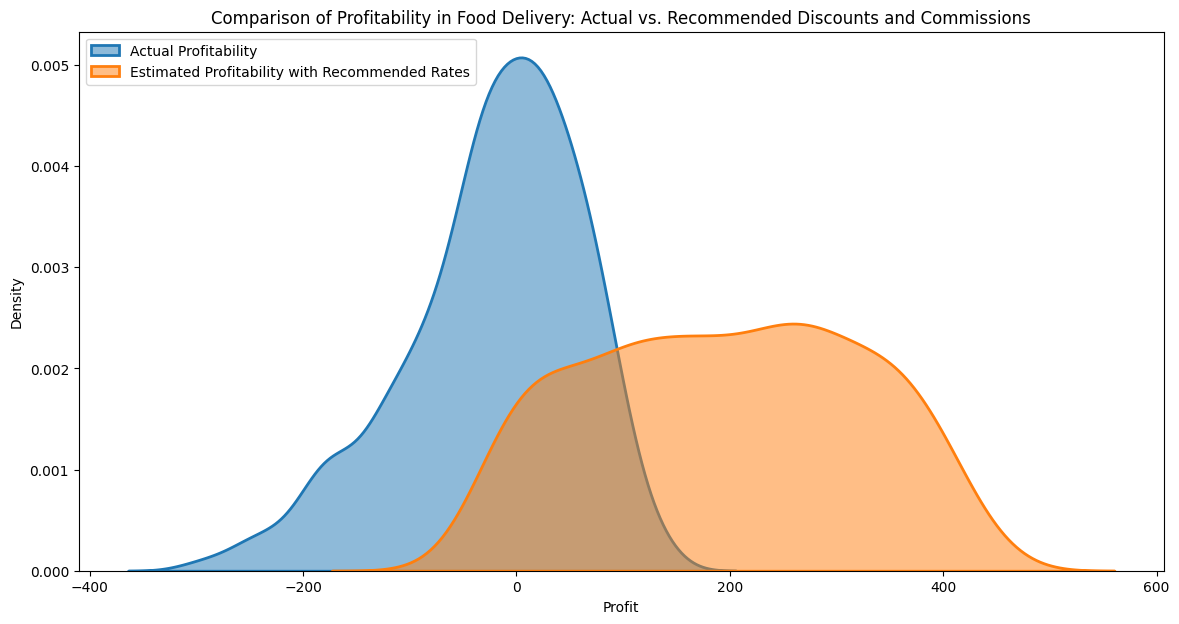

In [36]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
df['Simulated Commission Fee'] = df['Order Value'] * (recommended_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

In [32]:
# df.drop_duplicates(["Restaurant ID"])

In [33]:
# df.columns.values.tolist()[1:7:5]

In [34]:
# dup = df.duplicated(df.columns.values.tolist()[1:7:5],keep = False)
# df[dup]
# # for col in df.columns:
# df.isnull().any()
# # df["Discounts and Offers"] == df
